# Overview

Given the Ames Housing data, predict the final price of each home

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm

In [18]:
#Importing data

house_data = pd.read_csv("./AmesHousing.csv")
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
data_w = house_data.copy()

data_w.columns = data_w.columns.str.replace(" ", "")

data_w.info

<bound method DataFrame.info of       Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0         1  526301100          20       RL        141.0    31770   Pave   
1         2  526350040          20       RH         80.0    11622   Pave   
2         3  526351010          20       RL         81.0    14267   Pave   
3         4  526353030          20       RL         93.0    11160   Pave   
4         5  527105010          60       RL         74.0    13830   Pave   
...     ...        ...         ...      ...          ...      ...    ...   
2925   2926  923275080          80       RL         37.0     7937   Pave   
2926   2927  923276100          20       RL          NaN     8885   Pave   
2927   2928  923400125          85       RL         62.0    10441   Pave   
2928   2929  924100070          20       RL         77.0    10010   Pave   
2929   2930  924151050          60       RL         74.0     9627   Pave   

     Alley LotShape LandContour  ... PoolArea PoolQC  F

In [19]:
data_w.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_7776\1683444937.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_w["SalePrice"],fit=norm)
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

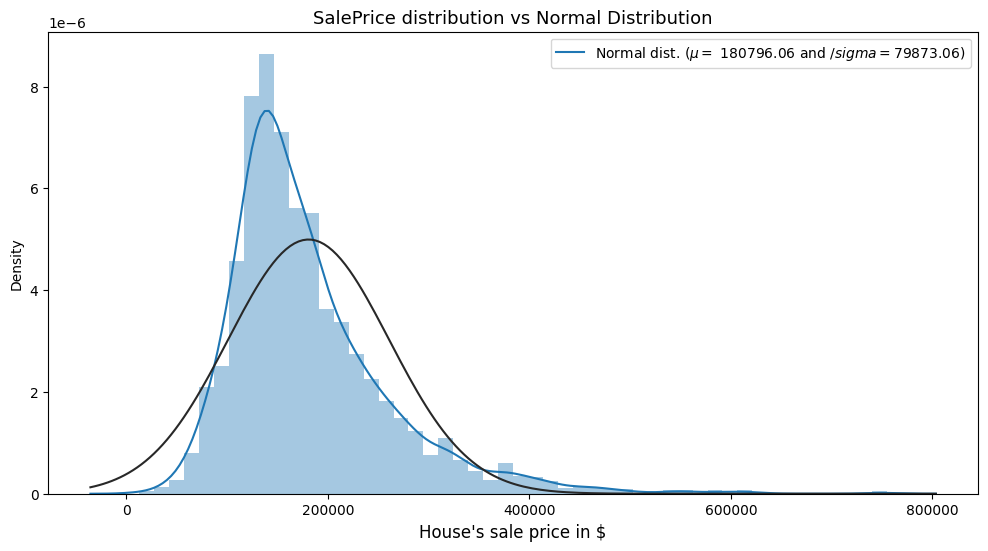

In [20]:
#Exploratory Data Analysis and Visualisation

(mu, sigma) = norm.fit(data_w["SalePrice"])
plt.figure(figsize = (12,6))

sns.distplot(data_w["SalePrice"],fit=norm)

plt.title("SalePrice distribution vs Normal Distribution", fontsize = 13)
plt.xlabel("House's sale price in $", fontsize = 12)
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $/sigma=${:.2f})".format(mu, sigma)], loc = "best")
plt.show()

In [21]:
#Correlation



# What does this mean? Google it

In literature, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis. Looking at the plot, we can clearly see how the distribution does not seem to be normal, but highly right-skewed. The non-normality of our distribution is also supported by the Shapiro test for normality (p-value really small that allows us to reject the hypotesis of normality). Despite that, let's leave it like that for now, we'll deal with that later in the notebook.


In [22]:
# Skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['SalePrice'])

print("Skewness: %f" % abs(data_w['SalePrice']).skew())
print("Kurtosis: %f" % abs(data_w['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.743500
Kurtosis: 5.118900
Shapiro_Test: 0.876261
Shapiro_Test: 0.000000


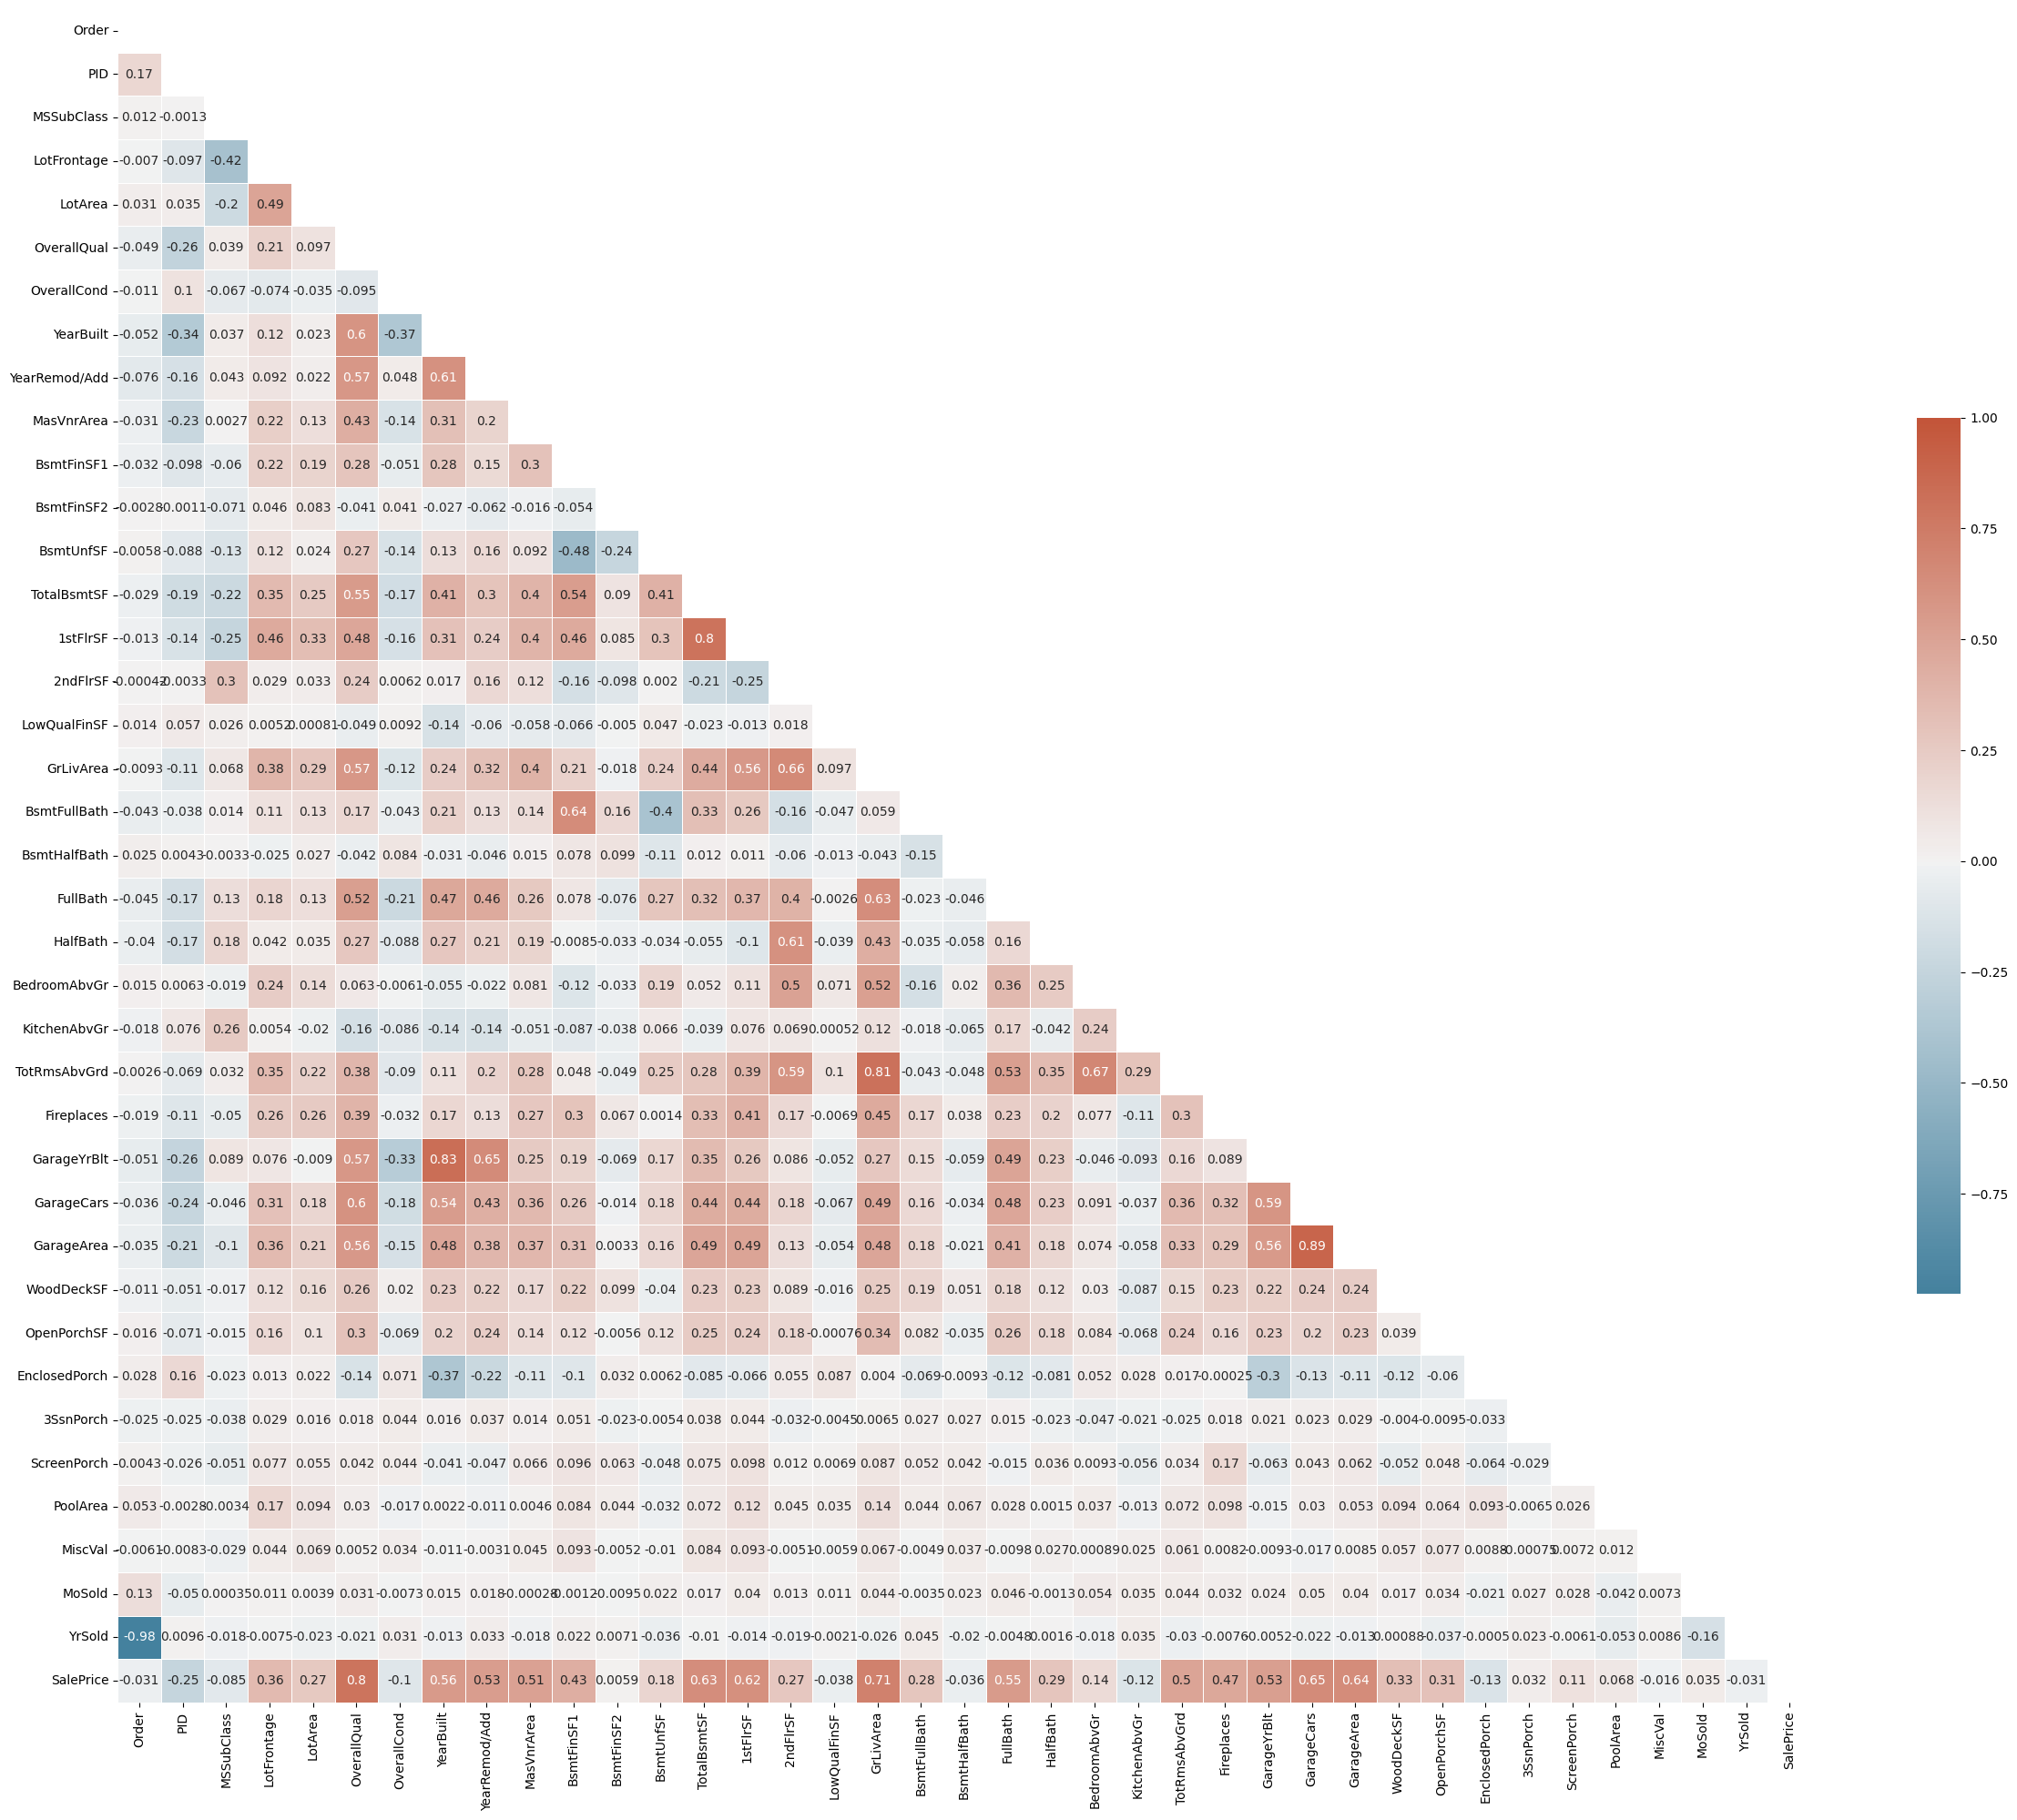

In [23]:
#Correlation Matrix


f, ax = plt.subplots(figsize=(30, 25))
numeric_data = data_w.select_dtypes(include=['number'])
mat = numeric_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From this, we can find which features correlates the most with the target, and then can investigate more in depth.

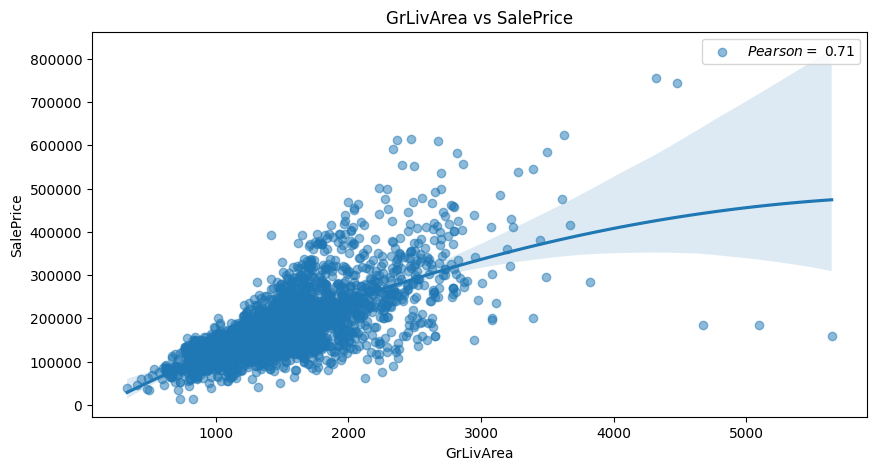

In [24]:
Pearson_GrLiv = 0.71
plt.figure(figsize = (10,5))
sns.regplot(data=data_w, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.5}, order =2 )
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

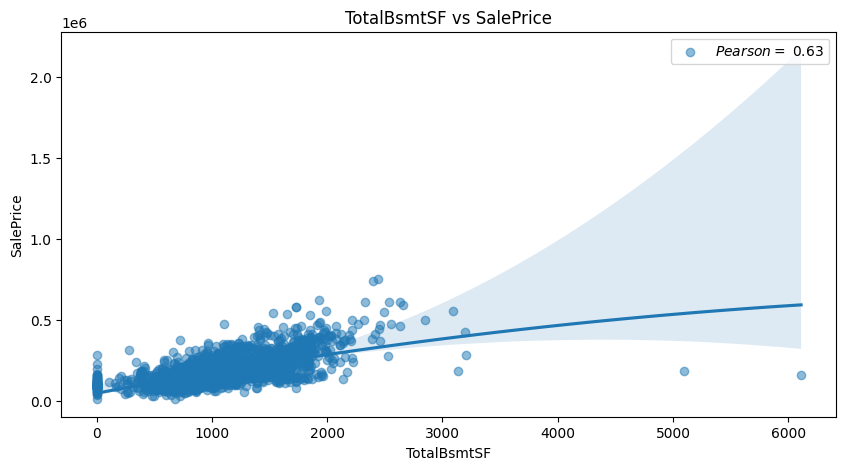

In [25]:
Pearson_TBSF = 0.63
plt.figure(figsize = (10,5))
sns.regplot(data = data_w, x = "TotalBsmtSF", y = "SalePrice", scatter_kws={"alpha": 0.5}, order =2 )
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

NameError: name 'Pearson_YrBlt' is not defined

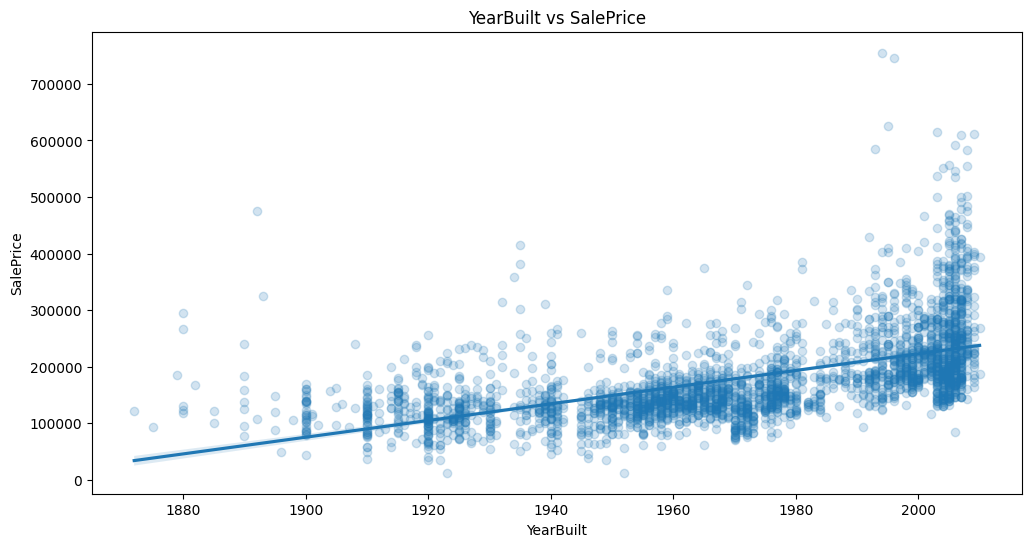

In [26]:
Pearson_YrBelt = 0.56
plt.figure(figsize=(12,6))
sns.regplot(data=data_w, x = "YearBuilt", y="SalePrice", scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBelt)], loc = 'best')
plt.show()